# Visual Language Models (VLM).

## Зачем использовать большие языковые модели (LLM) для работы с картинками?

<center><img src ="https://ml.gan4x4.ru/wb/VLM/maxresdefault.jpg" width="700"></center>

<center><em>Source: <a href="https://arxiv.org/abs/2103.00020">Learning Transferable Visual Models From Natural Language Supervision</a></em></center>

Перед вами обычная фотография кота. Давайте выполним небольшое мысленное упражнение:

* Определите, что вы видите.

* Ответьте, есть ли на картинке грустная собака.

* Опишите сцену одним-двумя предложениями.

Для человека это тривиальная задача. Но представьте, что вам нужно обработать так тысячу или десять тысяч изображений. Объем работы становится пугающим.

Очевидно, этот процесс нужно автоматизировать с помощью машинного обучения. Однако мы сталкиваемся с фундаментальным вызовом:

* **Компьютерное зрение** (например, CNN или ViT) отлично «понимает» картинку, но не может выразить это понимание в словах.

* **Языковые модели** (вроде GPT или BERT) мастерски генерируют текст, но они "слепы" у них нет доступа к визуальной информации.

Каждая модель сильна в своей узкой области, но задача "увидеть и описать" оказывается для них непосильной. Это наводит на мысль: что, если мы создадим гибридную модель, объединяющую зрение и язык?




Именно это и реализованно в Visual Language Models.

**Vision‑Language Models (VLMs)** соединяют **визуальные** инпуты (изображения/видео) с **текстом**. Они умеют в следующие задачи:
- **Captioning** (описание картинки), **VQA** (ответ на вопросы про изображение), **retrieval** (мэтчинг картинка - текст), и **мультимодальный чат**.
- Современные VLMs выучивают **совместное представление** где изображения и текст живут в совместном пространстве, позволяя **zero‑/few‑shot** генерализацию.

Первые VLM появились в 2021 году (CLIP). Но почему не раньше? Казалось бы, такая простая идея должна была быть реализована достаточно давно.

Для этого потребовалось созревание трёх ключевых компонентов:

* **Архитектура:** Трансформеры как универсальный вычислительный модуль.

* **Данные:** Доступ к огромным датасетам формата «изображение-текст».

* **Мощности:** Достаточные вычислительные ресурсы для их обучения.

Совокупность этих факторов и позволила создать модели, которые качественно объединяют языковые и визуальные представления.




## Архитектурные особенности VLM

Визуально-языковые модели нельзя описать одной универсальной схемой. За последние несколько лет сложилось несколько архитектурных направлений, которые развивались параллельно и решали разные задачи.

Первая линия развития связана с обучением совместного пространства для изображений и текста. Здесь изображение и текст кодируются отдельными энкодерами, после чего сравниваются в общем латентном пространстве. Такой подход оказался очень эффективным для задач поиска и zero-shot классификации, когда модель способна соотносить новое изображение и текстовое описание без дополнительного обучения.

Другой подход опирается на более тесное взаимодействие модальностей. Вместо того, чтобы просто сопоставлять эмбеддинги, такие модели объединяют визуальные и текстовые токены внутри одного трансформера. Это позволяет использовать механизмы кросс-внимания и строить более детализированные соответствия между частями изображения и словами. Подобные архитектуры показали высокую эффективность в задачах captioning и визуального вопросо-ответа, где требуется учитывать конкретные детали сцены.

Наконец, наиболее современное направление связано с интеграцией больших языковых моделей. В этих системах языковая модель остаётся замороженной, а между визуальным энкодером и текстовым декодером вставляется дополнительный адаптер, который переводит признаки изображения в форму, пригодную для обработки языковой моделью. Такой дизайн позволяет быстро наделять уже готовые LLM способностью работать с изображениями и открывает возможности для мультимодального диалога.

Таким образом, можно выделить три основных архитектурных ветви:
1. **Совместное пространство признаков** — фокус на сопоставлении изображения и текста.  
2. **Фьюжн-модели** — глубокая интеграция токенов с помощью кросс-внимания.  
3. **LLM-ориентированные решения** — использование языковой модели как центра, расширенного визуальными признаками.

Эти направления не конкурируют напрямую, а скорее дополняют друг друга и отражают разные пути к построению универсальных мультимодальных систем.


<center><img src ="https://ml.gan4x4.ru/wb/VLM/visual.jpg" width="800"></center>

<center><em>Source: <a href="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/blog/vlm/visual.jpg">huggingface</a></em></center>

Основные концепты, которые нам пригодятся:

**Контрастивное обучение :** максимизирует сходство для правильных пар (изображение, текст) и минимизирует его для несовпадающих. Такой подход обеспечивает устойчивую **zero-shot** классификацию с использованием текстовых промптов.

**Фьюжн и кросс-внимание:** позволяет текстовым токенам взаимодействовать с **визуальными токенами**, обеспечивая более точную привязку между изображением и текстом (используются потери ITM/MLM, captioning).

**LLM-бридж:** преобразует **визуальные признаки** в **токенное пространство** замороженной языковой модели (например, с помощью Q-Former или линейного проектора). Обучается дёшево и наследует возможности LLM.

**Instruction tuning:** обучение модели на тройках вида **изображение – инструкция – ответ**, часто сгенерированных GPT-4, чтобы научить её вести осмысленный мультимодальный диалог.


## CLIP (2021): Contrastive Language–Image Pre‑training
[Learning Transferable Visual Models From Natural Language Supervision](https://arxiv.org/abs/2103.00020)


<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L08/clip_idea.png" width="700"></center>

<center><em>Source: <a href="https://arxiv.org/abs/2103.00020">Learning Transferable Visual Models From Natural Language Supervision</a></em></center>

CLIP — одна из первых и наиболее влиятельных визуально-языковых моделей.  
Её ключевая идея заключается в **контрастивном обучении**: изображение и текст кодируются отдельно, а затем проецируются в общее латентное пространство. Правильные пары (изображение + соответствующая подпись) должны иметь максимальное сходство, а случайные пары — минимальное.

В основе архитектуры — два энкодера:
- **Визуальный энкодер**, обычно основанный на ResNet или Vision Transformer, преобразует изображение в вектор признаков.
- **Текстовый энкодер** (Transformer) кодирует текстовое описание в вектор той же размерности.

После кодирования оба вектора нормализуются, а их скалярное произведение используется для расчёта контрастивной функции потерь (InfoNCE).  
Обучение происходит на больших наборах данных пар *изображение–текст* (использовали около 400 млн пар), что позволяет модели обобщать без дополнительного обучения.

Особенности CLIP:
- Возможность **zero-shot классификации** через текстовые промпты.  
- Гибкость: модель не привязана к конкретным классам и может распознавать новые понятия.  
- Универсальность: CLIP может использоваться как готовый визуальный энкодер или в качестве части других VLM.

Примеры использования:
- Поиск изображения по тексту и наоборот.  
- Классификация без обучения на конкретной задаче (zero-shot).  
- Извлечение визуальных признаков для других моделей.


<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L08/clip_classifier.png" width="700"></center>

<center><em>Source: <a href="https://arxiv.org/abs/2103.00020">Learning Transferable Visual Models From Natural Language Supervision</a></em></center>

In [ ]:
!pip install -q transformers torch pillow requests

Посмотрим на картинку кота и подадим эту картинку в обученный CLIP.

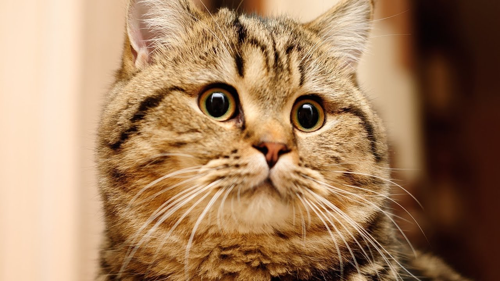

In [ ]:
from PIL import Image
import urllib.request
from IPython.display import display
url = "https://ml.gan4x4.ru/wb/VLM/maxresdefault.jpg"
image = Image.open(urllib.request.urlopen(url)).convert("RGB")
image.thumbnail((500, 500))
display(image)

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-image-classification", model="openai/clip-vit-base-patch32")

labels = ["a photo of a cat", "a photo of a dog", "a photo of an airplane"]

predictions = classifier(image, candidate_labels=labels)

for p in predictions:
    print(f"{p['label']}: {p['score']:.4f}")

Device set to use cuda:0


a photo of a cat: 0.9809
a photo of a dog: 0.0182
a photo of an airplane: 0.0009


Видно, что CLIP верно классифицирует нашу картинку. Но отличить кота от собаки и самолета сможет почти любая модель компьютерного зрения. Посмотрим на то, как CLIP классифицирует Sentiment:

In [ ]:
labels = ["a photo of a happy cat", "a photo of a sad cat"]

predictions = classifier(image, candidate_labels=labels)

for p in predictions:
    print(f"{p['label']}: {p['score']:.4f}")

a photo of a sad cat: 0.6041
a photo of a happy cat: 0.3959


## ALBEF (2021): Align Before Fuse

[Align Before Fuse: Vision and Language Representation Learning with Momentum Distillation](https://arxiv.org/abs/2107.07651)

<center><img src ="https://ml.gan4x4.ru/wb/VLM/ALBEF.webp" width="800"></center>

<center><em>Source: <a href="https://arxiv.org/abs/2107.07651">Align Before Fuse: Vision and Language Representation Learning with Momentum Distillation.</a></em></center>


ALBEF вышла в 2021г и сразу показала, почему одного выравнивания представлений мало. Сначала модель приводит визуальные и текстовые эмбеддинги к общему пространству, затем запускает совместное чтение в кроссмодальном трансформере. Благодаря этому она не просто находит объект на фото, а связывает слова и патчи так, чтобы понять действие и роль объекта в описании.

Архитектура опирается на три звена. Визуальный энкодер дает последовательность патчей с визуальным CLS токеном, текстовый энкодер формирует токены с текстовым CLS токеном, после чего кроссмодальный блок строит внимание между модальностями. Этап выравнивания отвечает за сходство верных пар и разобщение неверных. Затем совместное внимание уточняет соответствия слово к региону и регион к слову, а CLS пары становятся компактным представлением для последующих голов.

Обучающие цели распределены по задачам:

* Контрастивная цель формирует глобальную геометрию общего пространства.
* Image-Text Matching проверяет соответствие пары напрямую, что заставляет замечать тонкие рассинхроны близких по теме описаний.
* Masked Language Modeling скрывает часть слов и просит их восстановить с опорой на изображение, тем самым культивируя привычку использовать визуальный контекст, а не только языковую статистику.

Важную стабилизирующую роль играет так называемая momentum-модель учитель. Ее параметры являются сглаженным средним параметров студента, поэтому оценки сходства и выбор трудных негативных примеров получаются устойчивее. Это особенно ценно на интернет-данных с неточными подписями. Нередко добавляют последовательность недавних эмбеддингов, чтобы поддерживать плотный набор сложных примеров.

 CLIP останавливается на общей метрике в едином пространстве. ALBEF сначала приводит модальности к общему языку, а затем позволяет им взаимодействовать внутри внимания. Отсюда выигрывает детализация сцены: не только кто изображен, но и что именно происходит и как это связано с текстом. Этот прием стал опорой для следующей волны SOTA-моделей, например BLIP и SimVLM, где идея развита в сторону генерации и масштабных слабомаркированных данных.


## SimVLM (2021): Simple Visual Language Model
[SimVLM: Simple Visual Language Model Pretraining with Weak Supervision.](https://arxiv.org/abs/2108.10904)


<center><img src ="https://ml.gan4x4.ru/wb/VLM/SimVLM.png" width="800"></center>

<center><em>Source: <a href="https://arxiv.org/abs/2108.10904">SimVLM: Simple Visual Language Model Pretraining with Weak Supervision.n</a></em></center>


SimVLM появилась в начале 2022г и предложила на редкость прямой взгляд на мультимодальное обучение. SimVLM отказалась от раздельных кодировщиков для изображения и текста. Вся модель это один трансформер, который читает единую ленту токенов. Сначала идут визуальные токены, полученные из изображения через разбиение на патчи как в ViT, затем следуют текстовые токены. Маска внимания устроена так, что все, что стоит до генерируемой части, работает как общий префикс. Дальше модель двигается авторегрессивно и дописывает текст по одному токену вперед.

Такой режим часто называют префиксным языковым моделированием. Изображение формирует пролог, который задает контекст для будущих слов. Если стоит задача на подпись к изображению, достаточно самой картинки и служебного токена начала, модель продолжает предложение самостоятельно. В сценариях вроде вопросов к изображению пролог расширяется, к визуальной части добавляют короткую текстовую затравку, например сам вопрос или первые слова ответа. Механизм при этом не меняется, меняется только содержимое префикса.

Сила подхода раскрывается на масштабе. Обучение ведут на очень больших коллекциях пар картинка и текст, собранных из сети с минимальной ручной фильтрацией. Пары неизбежно шумные, но единый трансформер без разветвленных кроссмодальных модулей хорошо переваривает такой шум. Он учится сопоставлять слова и визуальные паттерны прямо внутри общего внимания, без дополнительных согласований между разными энкодерами. Благодаря этому модель уверенно переносится между задачами и демонстрирует сильные результаты в подписи изображений, в ответах на вопросы и в поиске по изображениям, в том числе в режимах без дообучения на целевом наборе.

Если сравнить этот минимализм с более сложными архитектурами, отличие видно сразу. В системах где текст и изображение проходят разными путями, приходится тщательно настраивать взаимодействие модальностей и исправлять рассинхроны между пространствами признаков. В SimVLM взаимодействие встроено в саму последовательность, слова смотрят на патчи напрямую и получают сигналы именно от тех регионов, которые важны для продолжения текста. Меньше инженерных уровней означает легче масштабировать данные и вычисления, проще адаптировать модель под разные формулировки задач и при этом не терять в детализации сцены.

Именно поэтому работа стала показательным примером того, как единый трансформер с префиксной маской способен покрыть и генерацию описаний, и ответы на вопросы, и мультимодальный поиск. Картинка задает контекст, текст дополняет его, а общий механизм внимания связывает их без лишних переходников. Получается ясная и практичная схема, которая объясняет хорошие результаты модели без обращения к сложным архитектурным трюкам.

Несмотря на свою простоту, SimVLM выдывал лучшие результаты на бенчмарках 2022 года.

[Подробнее: SimVLM: Simple Visual Language Model Pre-training with Weak Supervision](https://research.google/blog/simvlm-simple-visual-language-model-pre-training-with-weak-supervision)


## Flamingo (2022): Few‑Shot Visual Learning
[Flamingo: a Visual Language Model for Few‑Shot Learning](https://arxiv.org/abs/2204.14198)


<center><img src ="https://ml.gan4x4.ru/wb/VLM/flamingo.png" width="800"></center>

<center><em>Source: <a href="https://arxiv.org/abs/2204.14198">Flamingo: a Visual Language Model for Few‑Shot Learning</a></em></center>





Flamingo  -это одна из первых мультимодальных моделей, которая показала, что **достаточно подключить визуальную часть к уже готовой мощной языковой модели**, чтобы получить очень сильную систему, способную решать множество задач без дообучения.  
Если CLIP и ALBEF создавались как самостоятельные мультимодальные архитектуры, то Flamingo -это **надстройка** над уже существующим языковым «ядром».

Идея модели:  
языковая модель остаётся в основном **замороженной**, а между визуальным энкодером и LLM вставляются **перекрёстные блоки внимания** (perceiver resampler + cross-attention layers). Эти блоки позволяют языковой модели "обращаться" к визуальным признакам в нужные моменты генерации текста.  
Благодаря такому дизайну модель может обрабатывать переменное количество изображений (или даже видео) и динамически использовать визуальную информацию для ответа.



 **Как это работает:**  
- Изображение прогоняется через визуальный энкодер (обычно ViT или CNN), превращаясь в набор признаков.  
- Эти признаки проходят через «resampler», который снижает размерность и делает их удобными для LLM.  
- Языковая модель получает визуальные токены как дополнительный контекст и начинает генерацию текста.  
- При этом сама LLM не дообучается -только небольшое количество параметров в мультимодальных блоках.

Flamingo показала очень высокие результаты на VQA, captioning, retrieval и мультимодальном диалоге, обогнав многие специализированные модели того времени. Её подход стал основой для целого класса последующих VLM вроде LLaVA и MiniGPT.

Важно:  
- Flamingo не требует большого количества новых параметров.  
- Позволяет LLM гибко использовать визуальную информацию при генерации текста.  

Большие модели семейства Flamingo не имееют открытого кода и весов, однако есть имплементация [OpenFlamingo](https://github.com/mlfoundations/open_flamingo)


## BLIP (2022): Bootstrapping Language–Image Pre‑training
[BLIP: Bootstrapping Language-Image Pre-training](https://arxiv.org/abs/2201.12086)


<center><img src ="https://ml.gan4x4.ru/wb/VLM/blip.png" width="800"></center>

<center><em>Source: <a href="https://arxiv.org/abs/2201.12086">BLIP: Bootstrapping Language-Image Pre-training</a></em></center>




Модель BLIP предложила понятную и практичную парадигму для совместного обучения модели пониманию и генерации текста на основе изображений. Её архитектура, ставшая основой для многих современных SOTA-решений, основана на трёх ключевых шагах:

1. **Совместное представление:** модель сначала обучается сопоставлять текстовые и визуальные представления в общем пространстве.

2. **Кросс-модальное взаимодействие:** затем специальные трансформерные блоки позволяют этим представлениям «общаться» — обмениваться и объединять информацию.

3. **Языковое моделирование:** на верхнем уровне модель дообучается для генерации связного и контекстно-зависимого текста.

В результате формируется единая система, способная решать широкий спектр задач: поиск по изображениям, проверка соответствия картинки и текста, генерация подписей и визуальное вопросно-ответные задачи.



**Архитектура:** визуальный энкодер на базе Vision Transformer выдает последовательность патчей с CLS токенов. Текстовая часть использует трансформер на основе BERT, который может работать и как энкодер, и как декодер для генерации. Когда нужно просто выравнивание, изображения и тексты проходят через свои энкодеры, и модель учится тянуть близкие пары друг к другу, а далекие разводить в пространстве. Когда нужно совместное рассуждение, признаки обеих модальностей подаются в кроссмодальный трансформер. Внимание между модальностями связывает слова с нужными регионами и формирует общий CLS токен пары, который удобно использовать для классификации. Когда требуется подпись, текстовый трансформер берет картинку как контекст и авторегрессионно продолжает текст.

Исходные веб пары картинка и подпись шумные. В BLIP сначала берут предварительно обученную модель-описатель и генерируют альтернативные подписи к каждому изображению. Затем оценивают сходство между изображением и текстом и отбрасывают явный мусор. После такой очистки модель видит меньше случайных подписей и быстрее учится правильным соответствиям. Это сразу сказывается на генерации. Подписи становятся конкретнее и по делу, а ответы в VQA меньше блуждают вокруг темы.

В CLIP два энкодера выравнивают пространства, но дальше взаимодействия почти нет. В ALBEF появляется совместное чтение, но генерация не стоит в центре. BLIP соединяет оба мира. Сначала она уверенно строит общее пространство, учится читать изображение и текст вместе, а затем учится говорить. За счет этого одна и та же модель работает и как поисковик, и как проверяющий соответствие пар и картинок, и как генератор подписи или ответа. На практике именно такая связка объясняет сильные результаты BLIP на подписи изображений, VQA, мультимодальном поиске и задачах рассуждения, а также стабильную работу как в режиме zero-shot, так и при дообучении на целевой задаче.

Если свести к сути, BLIP держится на трех простых шагах. Дать понятные энкодеры для обеих модальностей. Научить их общаться в кроссмодальном внимании. Очистить веб данные через цикл сгенерировать и отфильтровать, чтобы обучение шло на осмысленных примерах. Из этой тройки и рождается впечатление, что модель одновременно точно видит, правильно сопоставляет и умеет формулировать ответ.

[Репозиторий](https://github.com/salesforce/BLIP)

Посмотрим на то, как BLIP умеет описывать картинки

In [ ]:
from transformers import pipeline
from PIL import Image
import requests

captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Device set to use cuda:0


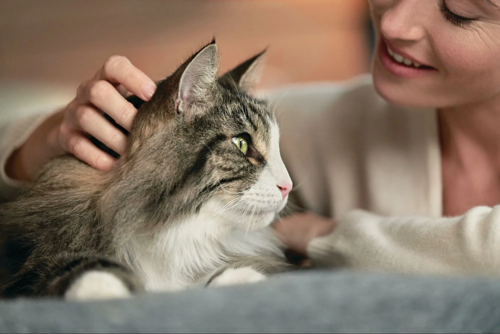

Caption: a woman is petting a cat on the couch


In [ ]:
image_url = "https://ml.gan4x4.ru/wb/VLM/cat_woman.webp"

caption = captioner(image_url, max_new_tokens=40)[0]["generated_text"]

image = Image.open(requests.get(image_url, stream=True).raw)
image.thumbnail((500, 500))
display(image)

print(f"Caption: {caption}")

## BLIP‑2 (2023): Q‑Former Bridge to Frozen LLMs
[BLIP-2: Bootstrapping Language-Image Pre-training with Frozen Image Encoders and Large Language Models](https://arxiv.org/abs/2301.12597)  


<center><img src ="https://ml.gan4x4.ru/wb/VLM/blip2.png" width="800"></center>

<center><em>Source: <a href="https://arxiv.org/abs/2301.12597">BLIP-2: Bootstrapping Language-Image Pre-training with Frozen Image Encoders and Large Language Models</a></em></center>



BLIP-2 продолжает линию "понять и рассказать", но делает это экономно. Визуальный энкодер и языковая модель берутся готовыми и остаются замороженными. Обучается только тонкий посредник под названием Q-Former. Благодаря этому большую часть знаний по зрению и по языку не нужно переучивать, а вся настройка сводится к правильной стыковке между ними.

**Q-Former** с архитектурной точки зрения - это небольшой трансформер с набором обучаемых векторов запросов (queries). В начале в модель вводится фиксированное количество специальных токенов запросов. Они проходят через слои self-attention, чтобы согласовать информацию между собой, а затем через слои cross-attention, где вектора ключей (keys) и значений (values) берутся из признаков замороженного визуального энкодера. Получается двуступенчатый цикл. Сначала запросы договариваются друг с другом о том, что именно они собираются вытащить из изображения. Затем они смотрят на карту визуальных признаков и забирают оттуда нужные фрагменты смысла. Такая чередующаяся схема self- и cross-attention повторяется несколько раз, что позволяет выделить стабильный компактный набор визуальных представлений одинаковой длины для любых изображений.

Дальше эти представления нужно подать языковой модели так, чтобы она восприняла их естественно. Для этого выходы Q-Former проходят через линейное преобразование в пространство эмбеддингов LLM. На практике это выглядит как вставка нескольких специальных токенов контекста перед текстом. Языковая модель видит их как часть входной последовательности и продолжает текст авторегрессионно Если на входе только изображение, то генерируется подпись. Если вместе с изображением идет вопрос, то продолжается ответ. Языковую модель при этом не трогают. Вся адаптация сосредоточена в Q-Former и в проекции к ее словарю признаков.

Обучение проходит в два шага. Сначала Q-Former учится извлекать содержательное и устойчивое представление изображения в присутствии текста. Для этого используют контрастивные и matching задачи, а также генерацию текста с условием на изображение. На этом этапе запросы осваивают роль смысловых щупалец. Они стабильно тянут к себе объекты, атрибуты и простые отношения вроде "объект к действию" и "объект к объекту". Затем учат передачу в LLM. Q-Former настраивает формат и порядок своих выходов так, чтобы языковая модель легко продолжала фразу, не ломая собственные привычки к синтаксису и стилю.

Такой мост дает несколько практических выгод. Фиксированное число запросов превращает произвольное изображение в последовательность одинаковой длины, что упрощает интерфейс с LLM и делает задержку предсказуемой. Замороженные зрительные и языковые блоки сохраняют накопленные знания, поэтому перенос на новые наборы данных получается дешевым. Небольшое число обучаемых параметров делает дообучение удобным даже на одном мощном сервере.

Если сравнить это с BLIP, различие сводится к месту, где происходит адаптация. В BLIP значимая часть параметров учится совместно. В BLIP-2 адаптация сосредоточена почти целиком в Q-Former. По сравнению с тяжеловесными решениями уровня Flamingo, BLIP-2 выигрывает по эффективности. Обучается малая доля параметров, а качество в подписи, в ответах на вопросы и в мультимодальном диалоге остается высоким.

В итоге получается ясная и практичная схема, где сильные готовые модули соединены аккуратным мостом и работают как единое целое.


In [ ]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration


blip2_id = "Salesforce/blip2-flan-t5-xl"
processor = Blip2Processor.from_pretrained(blip2_id)
model = Blip2ForConditionalGeneration.from_pretrained(blip2_id)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.81G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

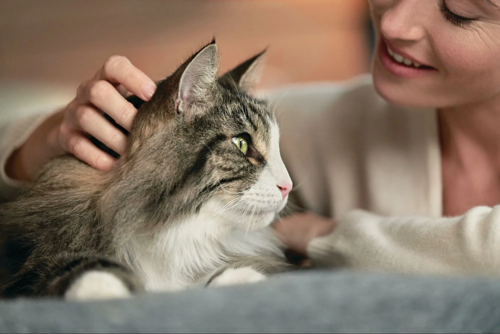

Q: What animal is in the picture?
A: cat


In [ ]:
question = "What animal is in the picture?"
inputs = processor(images=image, text=question, return_tensors="pt") # Use the existing image variable
out = model.generate(**inputs, max_new_tokens=20)
image.thumbnail((500, 500))
display(image)
print("Q:", question)
print("A:", processor.decode(out[0], skip_special_tokens=True))

## LLaVA (2023): Visual Instruction Tuning
[Visual Instruction Tuning](https://arxiv.org/abs/2304.08485)


<center><img src ="https://ml.gan4x4.ru/wb/VLM/llava.png" width="700"></center>

<center><em>Source: <a href="https://arxiv.org/abs/2304.08485">Visual Instruction Tuning
</a></em></center>






LLaVA показала, что мультимодальный ассистент можно собрать из готовых сильных блоков и научить его разговаривать о картинках так же естественно, как о тексте. Берут визуальный энкодер, например, CLIP, берут большую языковую модель семейства LLaMA или Vicuna, между ними ставят простой проекционный слой, который переводит карту признаков изображения в несколько визуальных токенов в пространстве эмбеддингов языка. Дальше вся магия делается данными и режимом обучения, а не тяжеловесной архитектурой.

Ключевое отличие от предыдущих моделей заключается в том, что LLaVA не стремится к универсальному префиксному языковому моделированию и не полагается на сложный мост наподобие Q-Former. Она делает ставку на обучении следованию инструкциям в мультимодальном формате. На вход идет пара картинка-инструкция в стиле, хорошо понятном человеку, на выходе ожидается ответ ассистента. Диалоговый формат сохраняется на протяжении нескольких ходов, поэтому модель учится не только описывать сцену, но и уточнять, переспрашивать и строить разворачивающееся объяснение.



Данные собирают в два шага. Сначала подготавливают базовое выравнивание, когда языковая модель привыкает читать небольшое число визуальных токенов рядом с текстом. Затем создают корпус визуальных инструкций. Для этого берут реальные изображения и генерируют пары инструкция-эталонный ответ с помощью более мощной модели. Важная деталь в том, что инструкции разнообразные. Встречаются просьбы дать короткую подпись, сформулировать длинное описание с акцентом на сюжет, ответить на вопрос со ссылкой на конкретные регионы, сравнить два объекта в кадре, прочитать текст на вывеске, сделать вывод по диаграмме. В такой смеси есть и вопросы с явным указанием области интереса, и открытые вопросы вроде "что в этой сцене необычного". Благодаря этому ассистент учится переносить навыки диалога из чисто текстовой среды в мир картинок.

Разницу хорошо видно на примерах. На фото стол с ноутбуком, тетрадью и кружкой. Модель уровня BLIP уверенно подпишет - "рабочее место с ноутбуком". SimVLM продолжит фразу в стиле подписи и тоже справится. LLaVA на запрос "что здесь может помешать работе" ответит, что кружка стоит слишком близко к краю и рядом открыта тетрадь со свободным местом, можно переставить кружку левее и избежать пролива. Если показать инфографику с двумя столбцами и спросить почему правый выше, ассистент не только прочтет подписи, но и сформулирует причину на естественном языке с отсылкой к легенде графика. Если попросить придумать заголовок для поста и тон записи, он учтет визуальный контекст и стиль инструкции.

Разебермся с архитектурой модели. Визуальный энкодер дает плотные признаки, проекционный слой сжимает и отображает их в пространство языковой модели, затем эти визуальные токены идут перед текстом инструкции. Языковая модель видит единый контекст и продолжает ответ авторегрессивно. Зрительный энкодер обычно замораживают, языковую модель дообучают на мультимодальных диалогах, а проекционный слой служит тонкой настройкой между мирами. Отсутствие громоздких кросс-модальных блоков делает сборку воспроизводимой и экономичной, зато требования к качеству инструкций растут, поэтому корпус мультимодальных диалогов тщательно проверяют и расширяют.

Именно эта связка простого стыка и богатых инструкций дала эффект прорыва. Там где BLIP решает поиск, подписи и проверку соответствия, а BLIP-2 экономно подает изображение в язык через узкий мост, LLaVA делает шаг к ассистенту, который понимает просьбы в полном разговорном контексте. Пользователь говорит как человек, указывает на части сцены, просит объяснить решение, а модель отвечает связно и по делу. Получается не просто система для подписи и ответов, а рабочий мультимодальный собеседник, который масштабируется за счет данных и остается доступным для исследователей благодаря открытым компонентам.


## OFA (2022): One Model For All (seq2seq)
[OFA: Unifying Architectures, Tasks, and Modalities](https://arxiv.org/abs/2202.03052)


<center><img src ="https://ml.gan4x4.ru/wb/VLM/OMA.png" width="1100"></center>

<center><em>Source: <a href="https://arxiv.org/abs/2202.03052">OFA: Unifying Architectures, Tasks, and Modalities</a></em></center>



OFA пытается не просто описывать картинки или отвечать на вопросы. Она стремится свести почти любые визуально языковые задачи к одному и тому же интерфейсу - последовательность на вход и последовательность на выход. В этом и есть ее уникальность. Модель не добавляет отдельные головы под детекцию, референтное выделение или связывание текста с регионами. На выходе модели всегда текст. Даже координаты объектов превращаются в токены с нормированными числами, а ссылки на области кадра выражаются словами. За счет этого одна и та же процедура декодирования покрывает подписи, ответы, референсные запросы, сравнения и простые формы визуального рассуждения.

Архитектура устроена как классический энкодер и декодер. Визуальный энкодер получает изображение и выдает последовательность признаков. Декодер читает текстовый промпт и через кросс внимание подключается к визуальным признакам. На каждом шаге он видит и уже сгенерированные слова и нужные фрагменты изображения и продолжает ответ авторегрессионно. Вся специфика задачи задается строкой промпта. Хочется подпись, напишите "опиши изображение" и ждите связный текст. Нужен ответ на вопрос, добавьте вопрос и слово: "ответ:". Нужна локализация, используйте шаблон с явной просьбой назвать координаты объекта. Никакой смены головы и перекомпоновки сети не требуется.

Может сложиться впечателение, что SimVLM и OFA - это практически одинаковые модели с одинаковой идеей. Однако это не так От SimVLM OFA отличается в двух ключевых местах. Во-первых, это не единый трансформер с префиксной маской, а четкая пара энкодер и декодер с кросс вниманием. Благодаря этому модель не только продолжает подпись по прологу, она программируется промптом и учится следовать инструкциям на уровне декодера. Во-вторых, OFA радикально унифицирует формат выходов. SimVLM блестяще решает подписи, вопросы и поиск, но не стремится выразить, скажем, координаты или пошаговые указания в едином текстовом канале. OFA делает это нацеленно, поэтому одна и та же модель одинаково естественно выдает и описание сцены, и строку с числами для рамки, и короткий ответ, и даже промежуточные рассуждения, если их попросить.



Данные под эту схему готовят как смесь разнородных корпусов. В одном батче встречаются подписи из крупных наборов, пары "вопрос-ответ" для изображений, примеры референтного выражения с привязкой к объектам, задачи на сопоставление текста и картинки, а также шаблоны где нужно вернуть координаты. Все это приводится к одному текстовому формату. Пример. Вопрос: "Что держит человек на фото?", далее изображение, далее "ответ:". Или просьба: "Укажи координаты красной кружки и верни четыре числа в нужном порядке". Такая многозадачная мешанина заставляет декодер реально использовать кросс внимание к нужным регионам, а не только полагаться на языковую статистику.

Практический эффект хорошо заметен на пограничных сценариях. На изображении два похожих предмета. Промпт просит выбрать тот, что ближе к окну, и вернуть координаты. OFA выдаст строку из чисел и при этом может расписать, чем выбранный объект отличается от соседнего, если это попросить сделать одной фразой. В подписи она держит стиль и фокус по промпту коротко и фактично или развернуто и сюжетно. В вопросах по схеме "почему правый столбец выше" ссылается на легенду и значения на оси, поскольку обучалась на примерах, где правильный ответ оформлен как обычный текст.

Если всю идею свести к одному предложению, OFA это seq2seq модель, которая делает ставку на текстовую унификацию всего что связано с изображениями. Энкодер дает зрительный контекст. Декодер, управляемый промптом, через кросс внимание достает нужные кусочки и формирует ответ в чистом текстовом виде. Именно эта программируемость промптом и текстовый формат результатов отличают ее от минималистичного префиксного подхода SimVLM и позволяют одной архитектурой закрывать широкий круг задач без переключения режимов работы сети.


## MiniGPT‑4 (2023): Open “Little Brother”
[MiniGPT‑4: Enhancing Vision‑Language Understanding with Advanced LLMs](https://arxiv.org/abs/2304.10592)


<center><img src ="https://ml.gan4x4.ru/wb/VLM/minigpt.png" width="800"></center>

<center><em>Source: <a href="https://arxiv.org/abs/2304.10592">MiniGPT‑4: Enhancing Vision‑Language Understanding with Advanced LLMs</a></em></center>


MiniGPT-4 и LLaVA строятся по одному принципу взять сильный зрительный энкодер, взять языковую модель и соединить их тонким проекционным слоем. Разница проявляется в том, что именно дообучается и на каких данных формируется поведение ассистента.

В MiniGPT-4 почти вся нагрузка ложится на проектор. Зрительный энкодер остается замороженным, языковую часть стараются не трогать, а выравнивание делают в два шага. Сначала учат проектор на парах изображение-описание, чтобы визуальные признаки уверенно переводились в язык эмбеддингов. Затем проводят небольшой, но тщательно отобранный инструкционный тюнинг на образцах формата картинка + инструкция + ответ, часто сгенерированных сильной моделью уровня GPT-4. Такой рецепт дает модели возможность генерировать особенно детализированное описание, умение развивать описание в короткий сюжет и базовые формы визуального рассуждения при очень скромном числе обучаемых параметров.

В LLaVA проектор тоже играет роль шлюза, но второй этап обычно затрагивает саму языковую модель. Ее слегка донастраивают на мультимодальных диалогах, а корпус инструкций значительно шире по типам запросов. В нем много примеров с пошаговым объяснением, задания на чтение текста в кадре, на разбор диаграмм, на уточняющие вопросы и на поддержание контекста через несколько ходов. В результате ассистент сильнее именно как собеседник он лучше держит долгую беседу, чаще выясняет недостающие детали и аккуратнее следует стилю инструкции.

Архитектуру MiniGPT-4 можно описать следующим образом. Изображение превращается в признаки, проектор отображает их в несколько визуальных токенов языка, дальше языковая модель продолжает ответ. Такой минимализм делает обучение дешевым и воспроизводимым и при этом дает высокий потолок качества в описаниях сцены.

Если смотреть на поведение, то MiniGPT-4 заметно сильна там, где нужен точный и богатый по деталям рассказ о кадре, где важно преобразовать визуальный контекст в плавный текст. Модель делает ставку на максимально легкую стыковку и аккуратные данные для обучения следованию инструкциям.

## Pixtral (2024): Long‑Context Open VLM (Mistral)
[Pixtral 12B](https://arxiv.org/html/2410.07073v2)


<center><img src ="https://ml.gan4x4.ru/wb/VLM/Pixtral.png" width="800"></center>

<center><em>Source: <a href="https://arxiv.org/html/2410.07073v2">Pixtral 12B</a></em></center>




Pixtral задуман как мультимодальный ассистент, который не теряет нить разговора даже в длинных сессиях и при этом видит мелкие детали на изображениях. В основе стоит языковой декодер семейства Mistral примерно **12 млрд параметров**. Он держит очень длинное окно внимания около **128к токенов**, поэтому умеет сопоставлять рисунки, таблицы и текстовые фрагменты из разных мест одного документа или из набора связанных изображений. Над ним работает зрительная часть, которая готовит компактные, но информативные представления картинок и передает их в общий контекст для генерации ответа.

Ключевой элемент здесь визуальный энкодер высокого разрешения, который устроен таким образом, что способен обрабатывать изображения очень высокого качества.  На вход подают крупные изображения без агрессивного уменьшения. Внутри энкодер разбивает кадр на патчи меньшего размера, чем это принято в базовых вариантах, и извлекает признаки на нескольких масштабах. Первый уровень ловит шрифт на осях графика, тонкие линии, мелкие пиктограммы, текст на стикерах. Последний уровень удерживает композицию страницы, взаимное расположение блоков, крупные объекты. Чтобы последовательность не разрасталась до бесконечности, поверх многомасштабных карт признаков применяют сжатие неинформативных областей, агрегацию по регионам интереса и редукцию по пространству с сохранением ярко выраженных контрастов. На выходе получается набор визуальных токенов, в котором остаются именно те детали, которые помогают отвечать на вопросы по документу или сцене, а не все подряд пиксели.

Дальше начинается совместная работа с языком. Визуальные токены через линейный слой приводятся к размерности эмбеддингов декодера и вставляются в его контекст рядом с текстом пользователя. Декодер видит единую последовательность и распределяет внимание как по словам, так и по визуальным токенам. Длинное окно здесь особенно важно. Пользователь может сослаться на диаграмму из начала отчета, затем на формулу в приложении и попросить связать их с абзацем выводов. Оба визуальных якоря и текстовые ссылки остаются в памяти модели в рамках одной сессии, поэтому ответ получается цельным и проверяемым по исходным фрагментам.

Обучение идет в несколько слоев. Сначала модель знакомят с крупными коллекциями пар изображение и текст и с документами, где в одном файле уживаются сканы страниц, диаграммы и длинные подписи. На этом этапе отрабатывается базовая привязка зрительных признаков к языковым описаниям и общий навык извлекать сгущенные визуальные токены без потери важных деталей. Затем добавляют задания на подписи, вопросы и ответы, чтение текста внутри изображения, сравнение графиков, ссылочные вопросы вроде найди пункт, где определяется коэффициент и проверь число в таблице. Финальный штрих дает инструкционный тюнинг на мультимодальных диалогах, где формулировки разнообразны по стилю и длине. Такой набор учит модель держать разговор, уточнять запрос, ссылаться на конкретные регионы и объяснять ход рассуждений обычным языком.

В поведенческом плане Pixtral выделяется двумя качествами. Она сохраняет силу чисто текстовой языковой модели, то есть уверенно рассуждает, переписывает, планирует, а вместе с тем не теряет устойчивость при большом количестве визуальных ссылок. И она действительно видит мелкие детали. Если в отчете нужно сверить цифры в трех таблицах, сопоставить с подписью к рисунку и подтвердить формулу из приложения, модель делает это в одном диалоге, потому что визуальный энкодер высокого разрешения передал в контекст читаемые токены про мелкий шрифт и тонкие элементы, а длинное окно внимания позволило этим токенам не исчезнуть по пути.

Именно эта комбинация объясняет ощущение универсальности.

# Заключение

В этой лекции мы рассмотрели основные концепции и эволюцию визуально-языковых моделей (VLM), от ранних подходов, фокусирующихся на сопоставлении изображений и текста, до современных мультимодальных чат-ботов. Мы подробно остановились на нескольких ключевых моделях, таких как CLIP, ALBEF, SimVLM, Flamingo, BLIP, BLIP-2, LLaVA, OFA и Pixtral, показав, как развивались архитектурные решения и подходы к обучению.

Важно понимать, что мир VLM развивается очень быстро, и в рамках одной лекции невозможно охватить все существующие модели и направления исследований. Мы сфокусировались на наиболее значимых и влиятельных архитектурах, которые заложили основу для современных достижений и открыли новые возможности для взаимодействия человека с машиной через комбинацию текста и изображений.

Если вы хотите углубить свои знания в области VLM, рекомендуем изучить следующие темы и материалы:

*   **Другие архитектуры VLM:** Существует множество других интересных моделей, таких как CoCa, GIT, Vision-Language Transformers (VL-T5, ViLBERT и т.д.). Изучите их архитектурные особенности и задачи, которые они решают.
*   **Мультимодальные датасеты:** Качество VLM напрямую зависит от данных. Ознакомьтесь с крупными мультимодальными датасетами (LAION, COCO, Visual Genome, VQAv2 и др.) и методами их сбора и обработки.
*   **Оценка VLM:** Понимание метрик и бенчмарков для оценки различных задач VLM (captioning, VQA, retrieval) поможет лучше ориентироваться в этой области.
*   **Применение VLM:** Исследуйте реальные примеры использования VLM в различных областях, от электронного коммерции до медицины и образования.
*   **Последние исследования:** Следите за публикациями на ведущих конференциях (CVPR, ICCV, ECCV, ACL, EMNLP) и в репозиториях, таких как arXiv, чтобы быть в курсе новейших разработок.

**Полезные ресурсы:**

*   [Hugging Face Transformers](https://huggingface.co/docs/transformers/index) - документация по использованию многих VLM моделей.
*   [LAVIS (Language-Vision Intelligence from Salesforce)](https://github.com/salesforce/LAVIS) - библиотека, содержащая множество моделей VLM, включая BLIP и BLIP-2.
*   [Раздел VLM на Hugging Face](https://huggingface.co/models?library=transformers&search=vlm) - список доступных моделей VLM.
*   [Awesome-VLM](https://github.com/altndrg/awesome-vlm) - курируемый список ресурсов по VLM.

Надеемся, эта лекция стала для вас хорошей отправной точкой в прекрасный мир визуально-языковых моделей!